**Пример 1.** 
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [84]:
X = zp.reshape((len(zp), 1)) # для решения без intercept'а
y = ks.reshape((len(ks), 1))
X_int = np.hstack([np.ones((len(X), 1)), X]) # для решения с intercept'ом
X_int

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

Построим линейную регрессию. Формула с intercept'ом: $$y = \beta_0 + \beta_1x$$
Без него:
$$y = \beta_1x$$

Для решения матричным методом применим формулу: $\hat{B} = ({X}^T \cdot {X})^{-1} \cdot {X}^T \cdot {Y}$, где $\hat{B}$ - вектор значений $\beta_0$ и $\beta_1$ или только $\beta_1$, соответственно.


In [85]:
# С intercept'ом
B_int = np.dot(np.linalg.inv(np.dot(X_int.T, X_int)), X_int.T@y)
B_int

array([[444.17735732],
       [  2.62053888]])

In [86]:
# Без intercept'а
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@y)
B

array([[5.88982042]])

Ответом будет 2 уравнения линейной регрессии:
$$y = 444.1774 + 2.6205x$$
или
$$y = 5.8898x$$

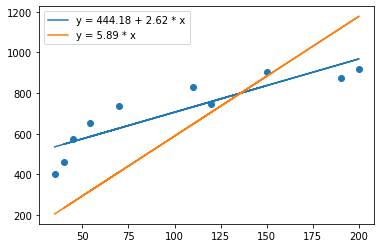

In [87]:
# Оценим визуально ответы
%matplotlib inline
plt.scatter(X,y)
plt.plot(X, B_int[0,0] + B_int[1,0] * X, label='y = 444.18 + 2.62 * x')
plt.plot(X, B[0,0] * X, label='y = 5.89 * x')
plt.legend()
plt.show()

Графически становится очевидно, что использование формулы с intercept'ом дало гораздо большую точность за счет того, что линия регрессии не привязана к началу координат и может более гибко подстраиваться.

**Пример 2.** 
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept). <br><br>
Зададим функцию средней квадратичной ошибки (Mean Squared Error) - её мы хотим минимизировать:
$$MSE = \frac{\sum\limits_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}$$

$\mathrm{MSE}$ =	mean squared error<br>
${n}$	=	number of data points<br>
$y_{i}$	=	observed values<br>
$\hat{y}_{i}$	=	predicted values<br>

Соответственно, для модели $y = \beta_1x$ можем произвести подстановку $\hat{y_i} = \beta_1x_i$, отсюда окончательная формула:

$$MSE = \frac{\sum\limits_{i=1}^{n}(y_i - \beta_1x_i)^2}{n}$$

In [88]:
X, y = zp, ks
n = len(y)
B1 = 0.1
alpha = 1e-6 # Скорость обучения
alpha

1e-06

In [89]:
def mse_(B1, y=y, X=X, n=n):
  """Функция MSE"""
  return np.sum((y-B1*X)**2)/n

Находим далее производную по переменной $\beta_1$, когда $y_i$ и $x_i$ константы.
$$MSE_{\beta_1}' = 2 \cdot \frac{\sum\limits_{i=1}^{n}(y_i - \beta_1x_i) \cdot (-x_i)}{n}$$

In [90]:
#mse = (1/n)*np.sum((y-B1*X)**2)
#mse_der = (2/n)*np.sum((y-B1*X)*X) 

In [91]:
def mse_der(B1, y=y, X=X, n=n):
  """Производная MSE"""
  return -2*np.sum((y-B1*X)*X)/n

In [92]:
for i in range(600):
  B1 -= alpha*(2/n)*np.sum((y-B1*X)*(-1)*X) # В зависимости от знака можно подбирать B1 в ту или иную сторону
  if i%30==0:
    print(f'B1={B1}, MSE={mse_(B1)}, MSE_der={mse_der(B1)}')

B1=0.25952808, MSE=493237.7212546963, MSE_der=-155132.57090614398
B1=3.4547782236263824, MSE=138204.25062502263, MSE_der=-67093.20464877757
B1=4.836690291080364, MSE=71796.25222021657, MSE_der=-29017.105071804508
B1=5.434352720103083, MSE=59374.825462025976, MSE_der=-12549.592632455746
B1=5.692835432193034, MSE=57051.433003054815, MSE_der=-5427.5667696988985
B1=5.804626485478126, MSE=56616.849068093856, MSE_der=-2347.3655203240974
B1=5.852974939784972, MSE=56535.56138215128, MSE_der=-1015.2108891167085
B1=5.873885137561711, MSE=56520.35675226433, MSE_der=-439.06802773466916
B1=5.882928578088004, MSE=56517.512769595625, MSE_der=-189.89230222560946
B1=5.8868397709626885, MSE=56516.98081074626, MSE_der=-82.12642271085133
B1=5.888531320728348, MSE=56516.88130936019, MSE_der=-35.518813707677324
B1=5.889262898203911, MSE=56516.862697909644, MSE_der=-15.361513208007091
B1=5.889579297764605, MSE=56516.85921669088, MSE_der=-6.643692832276429
B1=5.889716137245525, MSE=56516.858565538845, MSE_der

В результате получаем ответ как в пункте 1 для линейной регрессии без intercept'а:
$$y = 5.8898x$$

Выше можно отметить, что при таком значении $\beta_1$ значение функции $MSE$ стремится к своему минимуму, а её производная стремится к нулю.

**Задание 4.** Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).<br><br>
Для модели линейной регрессии с intercept'ом вида $y = \beta_0 + \beta_1x$ после подстановки получаем соответственно:

$$MSE = \frac{\sum\limits_{i=1}^{n}(y_i - \beta_0 - \beta_1x_i)^2}{n}$$
и частные производные вида:
$$MSE_{\beta_0}' = 2 \cdot \frac{\sum\limits_{i=1}^{n}(y_i - \beta_0 - \beta_1x_i) \cdot (-1)}{n}$$
$$MSE_{\beta_1}' = 2 \cdot \frac{\sum\limits_{i=1}^{n}(y_i - \beta_0 -  \beta_1x_i) \cdot (-x_i)}{n}$$

In [93]:
X, y = zp, ks
n = len(y)
np.random.seed(42)
B0 = np.random.randn(1) # Попробуем сгенерировать случайно, т.к. начальное значение не принципиально
B1 = np.random.randn(1)

In [94]:
# Настроим гиперпараметры
epochs = 2000000 # Число итераций обучения модели
alpha = 5e-5 # Скорость обучения
alpha

5e-05

In [95]:
def mse_int(B0, B1, y=y, X=X, n=n):
  """Функция MSE"""
  return np.sum((y-B0-B1*X)**2)/n

def mse_der_b0_int(B0, B1, y=y, X=X, n=n):
  """Производная MSE"""
  return [-2*np.sum((y-B0-B1*X))/n]

def mse_der_b1_int(B0, B1, y=y, X=X, n=n):
  """Производная MSE"""
  return [-2*np.sum((y-B0-B1*X)*X)/n]

In [96]:
for i in range(1400000):
  B0 -= alpha*(2/n)*np.sum((y-B0-B1*X)*(-1))
  B1 -= alpha*(2/n)*np.sum((y-B0-B1*X)*(-1)*X) # В зависимости от знака можно подбирать B1 в ту или иную сторону
  if i%200000==0:
    print(f'B0={B0}, B1={B1}, MSE={mse_int(B0, B1)}, mse_der_b0_int={mse_der_b0_int(B0, B1)}, mse_der_b1_int={mse_der_b1_int(B0, B1)}')

B0=[0.56905648], B1=[8.16061666], MSE=127690.26150363192, mse_der_b0_int=[236.31117227169608], mse_der_b1_int=[62683.10770051738]
B0=[441.39996253], B1=[2.64098122], MSE=6472.3709524663445, mse_der_b0_int=[-1.4090840305107803], mse_der_b1_int=[-0.003916893695713952]
B0=[444.15996894], B1=[2.62066687], MSE=6470.414277873725, mse_der_b0_int=[-0.0088218252853153], mse_der_b1_int=[-2.4522418243577704e-05]
B0=[444.17724846], B1=[2.62053968], MSE=6470.414201179667, mse_der_b0_int=[-5.523063146597451e-05], mse_der_b1_int=[-1.5352779882960022e-07]
B0=[444.17735664], B1=[2.62053889], MSE=6470.414201176661, mse_der_b0_int=[-3.457820014318713e-07], mse_der_b1_int=[-9.626091923564673e-10]
B0=[444.17735732], B1=[2.62053888], MSE=6470.414201176657, mse_der_b0_int=[-2.208435034845024e-09], mse_der_b1_int=[-5.093170329928398e-12]
B0=[444.17735732], B1=[2.62053888], MSE=6470.414201176658, mse_der_b0_int=[-5.684000825567636e-10], mse_der_b1_int=[-0.0]


Ещё пробую вариант из одной статьи:

In [97]:
X, y = zp, ks
n = len(y)
np.random.seed(42)
B0 = np.random.randn(1) # Попробуем сгенерировать случайно, т.к. начальное значение не принципиально
B1 = np.random.randn(1)

In [98]:
# Настроим гиперпараметры
epochs = 1400000 # Число итераций обучения модели
alpha = 5e-5 # Скорость обучения
alpha

5e-05

В принципе то же самое, но более детально расписаны шаги.

In [99]:
for epoch in range(epochs):
  # Computes our model's predicted output
  y_pred = B0 + B1 * X

  # How wrong is our model? That's the error! 
  error = (y - y_pred)
  # It is a regression, so it computes mean squared error (MSE)
  loss = (error ** 2).mean()

  # Computes gradients for both "a" and "b" parameters
  B0_grad = -2 * error.mean()
  B1_grad = -2 * (X * error).mean()

  # Updates parameters using gradients and the learning rate
  B0 = B0 - alpha * B0_grad
  B1 = B1 - alpha * B1_grad
  if epoch%200000==0:
    print(B0, B1, mse_int(B0, B1), mse_der_b1_int(B0, B1))

[0.56905648] [8.16135021] 127736.25018640919 [62703.31938377153]
[441.39891067] [2.64098948] 6472.372434876379 [0.01037463503635081]
[444.15995577] [2.62066697] 6470.414277989975 [6.497686918010004e-05]
[444.17724834] [2.62053968] 6470.414201179671 [4.0696140786167233e-07]
[444.17735664] [2.62053889] 6470.414201176659 [2.552405931055546e-09]
[444.17735732] [2.62053888] 6470.414201176658 [1.4915713109076022e-11]
[444.17735732] [2.62053888] 6470.414201176658 [-3.637978807091713e-12]


**Задание 3.**
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Ответ: таблица значений функции Лапласа используется для получения Z-критерия, когда известно среднее квадратичное отклонение генеральной совокупности. Когда среднее квадратичное отклонение генеральной совокупности не известно, то используется таблица распределения Стьюдента.